# Assignment 6.1
Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## Data Exploration

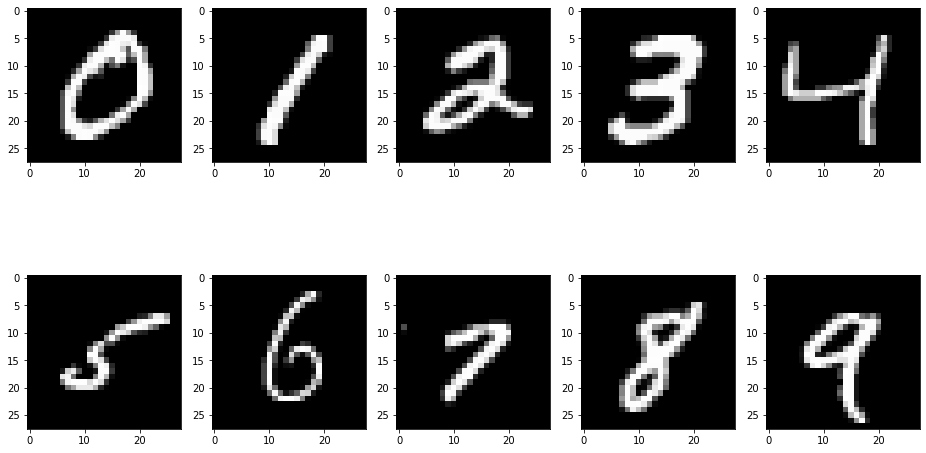

In [2]:
# Loading the data into memory
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

fig, [[ax0, ax1, ax2, ax3, ax4], 
      [ax5, ax6, ax7, ax8, ax9]] = plt.subplots(2,5, figsize=(16,9))

ax0.imshow(train_images[1], cmap='gray')
ax1.imshow(train_images[3], cmap='gray')
ax2.imshow(train_images[5], cmap='gray')
ax3.imshow(train_images[7], cmap='gray')
ax4.imshow(train_images[2], cmap='gray')
ax5.imshow(train_images[11], cmap='gray')
ax6.imshow(train_images[18], cmap='gray')
ax7.imshow(train_images[29], cmap='gray')
ax8.imshow(train_images[17], cmap='gray')
ax9.imshow(train_images[4], cmap='gray')

The training data contains 60,000 observations of 28x28 pixel images with targets ranging from 0 to 9

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

The testing set contains 10,000 images

In [5]:
test_images.shape

(10000, 28, 28)

The images contain gray level values ranging from 0 (black) to 255 (white)

In [6]:
train_images[0].max()

255

## Preparing the data
The data will need to be reshaped and normalized before we feed it into a neural network

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / train_images.max()

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / train_images.max()

train_images_val = train_images[:10000]
train_images = train_images[10000:]

train_labels_val = train_labels[:10000]
train_labels = train_labels[10000:]

## Building the neural net

In [8]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [9]:
model = models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64, 
                    validation_data = (train_images_val, train_labels_val), 
                    verbose=True)

Epoch 1/20
782/782 [==============================] - 34s 42ms/step - loss: 0.4694 - acc: 0.8456 - val_loss: 0.1131 - val_acc: 0.9671
Epoch 2/20
782/782 [==============================] - 33s 42ms/step - loss: 0.0537 - acc: 0.9832 - val_loss: 0.0443 - val_acc: 0.9881
Epoch 3/20
782/782 [==============================] - 30s 39ms/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0438 - val_acc: 0.9886
Epoch 4/20
782/782 [==============================] - 31s 40ms/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0376 - val_acc: 0.9890
Epoch 5/20
782/782 [==============================] - 32s 41ms/step - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0533 - val_acc: 0.9882
Epoch 6/20
782/782 [==============================] - 32s 41ms/step - loss: 0.0154 - acc: 0.9955 - val_loss: 0.0458 - val_acc: 0.9900
Epoch 7/20
782/782 [==============================] - 36s 46ms/step - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0407 - val_acc: 0.9898
Epoch 8/20
782/782 [==============================] - 34s 43ms

In [11]:
import sklearn.metrics as metrics
from seaborn import heatmap
import numpy as np

313/313 [==============================] - 2s 7ms/step - loss: 25.2807 - acc: 0.9882
[25.280717849731445, 0.9882000088691711]


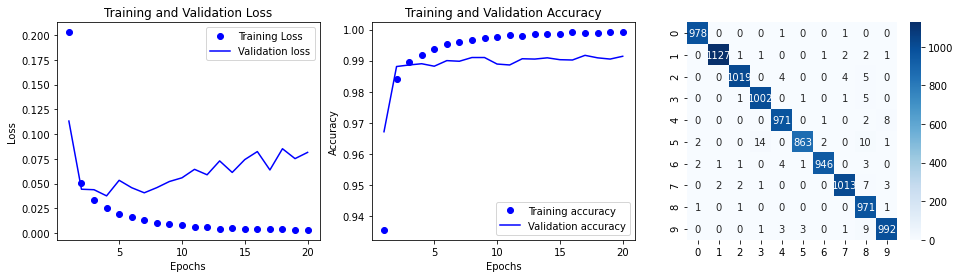

In [12]:
results = model.evaluate(test_images, test_labels)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=test_labels, 
                                            y_pred=model.predict(test_images).argmax(axis = 1))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

In [13]:
model = models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=64, 
                    validation_data = (train_images_val, train_labels_val))

Epoch 1/5
782/782 [==============================] - 33s 41ms/step - loss: 0.4356 - accuracy: 0.8596 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 2/5
782/782 [==============================] - 31s 40ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.0545 - val_accuracy: 0.9855
Epoch 3/5
782/782 [==============================] - 32s 41ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0387 - val_accuracy: 0.9885
Epoch 4/5
782/782 [==============================] - 31s 39ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0448 - val_accuracy: 0.9871
Epoch 5/5
782/782 [==============================] - 31s 40ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0449 - val_accuracy: 0.9892


313/313 [==============================] - 2s 6ms/step - loss: 11.5415 - accuracy: 0.9860
[11.541476249694824, 0.9860000014305115]


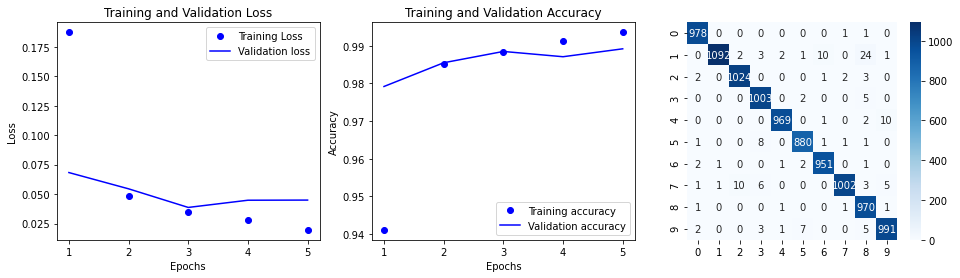

In [14]:
results = model.evaluate(test_images, test_labels)
print(results)

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=test_labels, 
                                            y_pred=model.predict(test_images).argmax(axis = 1))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

## Save Results

In [15]:
model.save('results/model_6_1.h5')